# SPRINT 4: Supervised Learning - Classification

## Objective
This is the core of our project. In this notebook, we will train, evaluate, and compare several supervised learning models to predict the presence of heart disease. We will conduct two main experiments to determine which data preparation strategy yields the best results:
1.  **Experiment A:** Using the feature-selected data (from RFE).
2.  **Experiment B:** Using the dimensionality-reduced data (from PCA).

### Models to be Trained:
- Logistic Regression
- Decision Tree
- Random Forest
- Support Vector Machine (SVM)

### Evaluation Metrics:
- Accuracy, Precision, Recall, F1-score
- ROC Curve & AUC Score

## Experiment A: Modeling with RFE Selected Features

In this experiment, we will train our models on the dataset created from Recursive Feature Elimination (RFE). This data is smaller and more interpretable.

In [1]:
# --- 1. Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model Selection
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# --- 2. Load the RFE-selected Feature Data ---
RFE_DATA_PATH = '../data/heart_disease_rfe_features.csv'
df_rfe = pd.read_csv(RFE_DATA_PATH)

# --- 3. Separate Features (X) and Target (y) ---
X_rfe = df_rfe.drop('target', axis=1)
y_rfe = df_rfe['target']

# --- 4. Split the data into Training and Testing sets ---
# This is a crucial step for valid model evaluation.
# We train the model on the training set and test its performance on the unseen testing set.
# test_size=0.2 means we use 80% for training and 20% for testing.
# random_state=42 ensures that we get the same split every time we run the code.
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y_rfe, test_size=0.2, random_state=42)

# --- 5. Verify the shapes of the new datasets ---
print("--- Shape of the datasets ---")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

--- Shape of the datasets ---
X_train shape: (242, 12)
X_test shape: (61, 12)
y_train shape: (242,)
y_test shape: (61,)


### 1. Logistic Regression

Our first model is **Logistic Regression**. It's a fundamental and highly interpretable classification algorithm that serves as an excellent **baseline model**. We will train it on our training data and then evaluate its performance on the unseen test data.

In [2]:
# --- 1. Instantiate and Train the Logistic Regression Model ---
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# --- 2. Make Predictions on the Test Data ---
y_pred_lr = lr_model.predict(X_test)

# --- 3. Evaluate the Model's Performance ---
# We'll calculate the key metrics and store them for later comparison.
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)

# --- 4. Print the Performance Metrics ---
print("--- Logistic Regression Model Performance ---")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1-Score: {lr_f1:.4f}")

--- Logistic Regression Model Performance ---
Accuracy: 0.8852
Precision: 0.9032
Recall: 0.8750
F1-Score: 0.8889


### 2. Decision Tree Classifier

Next, we will train a **Decision Tree Classifier**. This model creates a tree-like structure of decisions based on the feature values to classify data. One of the main advantages of Decision Trees is their high interpretability.

In [3]:
# --- 1. Instantiate and Train the Decision Tree Model ---
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# --- 2. Make Predictions on the Test Data ---
y_pred_dt = dt_model.predict(X_test)

# --- 3. Evaluate the Model's Performance ---
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

# --- 4. Print the Performance Metrics ---
print("--- Decision Tree Model Performance ---")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1-Score: {dt_f1:.4f}")

--- Decision Tree Model Performance ---
Accuracy: 0.8033
Precision: 0.8125
Recall: 0.8125
F1-Score: 0.8125


### 3. Random Forest Classifier

Now, we will train a **Random Forest Classifier**. This is an **ensemble model**, which means it is constructed from many individual Decision Trees. It combines their outputs to make a final, more robust prediction. Random Forests are one of the most popular and effective machine learning models because they are typically more accurate and less prone to overfitting than a single Decision Tree.

In [4]:
# --- 1. Instantiate and Train the Random Forest Model ---
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# --- 2. Make Predictions on the Test Data ---
y_pred_rf = rf_model.predict(X_test)

# --- 3. Evaluate the Model's Performance ---
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

# --- 4. Print the Performance Metrics ---
print("--- Random Forest Model Performance ---")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")

--- Random Forest Model Performance ---
Accuracy: 0.8689
Precision: 0.9286
Recall: 0.8125
F1-Score: 0.8667


### 4. Support Vector Machine (SVM)

Our final model is the **Support Vector Machine (SVM)**, implemented as `SVC` (Support Vector Classifier). SVMs are powerful models that work by finding the optimal hyperplane that best separates the different classes in the data. They are known for being effective, especially when the data has a clear margin of separation.

In [5]:
# --- 1. Instantiate and Train the Support Vector Machine Model ---
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# --- 2. Make Predictions on the Test Data ---
y_pred_svm = svm_model.predict(X_test)

# --- 3. Evaluate the Model's Performance ---
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

# --- 4. Print the Performance Metrics ---
print("--- Support Vector Machine (SVM) Model Performance ---")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1-Score: {svm_f1:.4f}")

--- Support Vector Machine (SVM) Model Performance ---
Accuracy: 0.8689
Precision: 0.9000
Recall: 0.8438
F1-Score: 0.8710


## Experiment A: Results Summary

We have now trained and evaluated all four models. To easily compare their performance side-by-side, let's gather all the metric scores into a single summary table.

In [6]:
# --- 1. Create a dictionary with the results ---
results_data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM'],
    'Accuracy': [lr_accuracy, dt_accuracy, rf_accuracy, svm_accuracy],
    'Precision': [lr_precision, dt_precision, rf_precision, svm_precision],
    'Recall': [lr_recall, dt_recall, rf_recall, svm_recall],
    'F1-Score': [lr_f1, dt_f1, rf_f1, svm_f1]
}

# --- 2. Create a DataFrame and sort by Accuracy ---
results_df = pd.DataFrame(results_data)
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)

# --- 3. Display the results table ---
print("--- Summary of Model Performance (RFE Features) ---")
results_df_sorted

--- Summary of Model Performance (RFE Features) ---


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.885246,0.903226,0.87500,0.888889
2,Random Forest,0.868852,0.928571,0.81250,0.866667
3,SVM,0.868852,0.900000,0.84375,0.870968
1,Decision Tree,0.803279,0.812500,0.81250,0.812500


## Experiment B: Modeling with PCA Components

Now, for our second experiment, we will repeat the entire modeling process using the data derived from Principal Component Analysis (PCA). The goal is to see if this different data preparation strategy can yield better performance. We will start by loading the fully processed data, applying our PCA transformation, and then splitting the result for training and testing.

In [7]:
# --- 1. Import necessary NEW libraries for this step ---
from sklearn.decomposition import PCA

# --- 2. Load the FULL Processed Data ---
# We start with the clean data from notebook 01.
df_processed = pd.read_csv('../data/heart_disease_processed.csv')
X_orig = df_processed.drop('target', axis=1)
y_orig = df_processed['target']

# --- 3. Apply our PCA recipe ---
# We use the optimal number of components (12) that we discovered in notebook 02.
pca = PCA(n_components=12, random_state=42)
X_pca = pca.fit_transform(X_orig)

# --- 4. Split the PCA data into Training and Testing sets ---
# We use the same random_state for a fair comparison with Experiment A.
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_orig, test_size=0.2, random_state=42)

# --- 5. Verify the shapes ---
print("--- Shape of the PCA datasets for Experiment B ---")
print("X_train_pca shape:", X_train_pca.shape)
print("X_test_pca shape:", X_test_pca.shape)
print("y_train_pca shape:", y_train_pca.shape)
print("y_test_pca shape:", y_test_pca.shape)

--- Shape of the PCA datasets for Experiment B ---
X_train_pca shape: (242, 12)
X_test_pca shape: (61, 12)
y_train_pca shape: (242,)
y_test_pca shape: (61,)


### 1. Logistic Regression (on PCA Data)

Let's begin Experiment B by training our baseline model, Logistic Regression, on the PCA-transformed features. We will follow the same evaluation procedure as in Experiment A.

In [8]:
# --- 1. Instantiate and Train the Logistic Regression Model on PCA data ---
lr_model_pca = LogisticRegression(random_state=42)
lr_model_pca.fit(X_train_pca, y_train_pca)

# --- 2. Make Predictions on the PCA Test Data ---
y_pred_lr_pca = lr_model_pca.predict(X_test_pca)

# --- 3. Evaluate the Model's Performance ---
lr_pca_accuracy = accuracy_score(y_test_pca, y_pred_lr_pca)
lr_pca_precision = precision_score(y_test_pca, y_pred_lr_pca)
lr_pca_recall = recall_score(y_test_pca, y_pred_lr_pca)
lr_pca_f1 = f1_score(y_test_pca, y_pred_lr_pca)

# --- 4. Print the Performance Metrics ---
print("--- Logistic Regression (PCA) Model Performance ---")
print(f"Accuracy: {lr_pca_accuracy:.4f}")
print(f"Precision: {lr_pca_precision:.4f}")
print(f"Recall: {lr_pca_recall:.4f}")
print(f"F1-Score: {lr_pca_f1:.4f}")

--- Logistic Regression (PCA) Model Performance ---
Accuracy: 0.8689
Precision: 0.8750
Recall: 0.8750
F1-Score: 0.8750


### 2. Decision Tree Classifier (on PCA Data)

Next, we will train the Decision Tree Classifier on our PCA-transformed data to see how this model performs on a less interpretable but potentially more condensed feature set.

In [9]:
# --- 1. Instantiate and Train the Decision Tree Model on PCA data ---
dt_model_pca = DecisionTreeClassifier(random_state=42)
dt_model_pca.fit(X_train_pca, y_train_pca)

# --- 2. Make Predictions on the PCA Test Data ---
y_pred_dt_pca = dt_model_pca.predict(X_test_pca)

# --- 3. Evaluate the Model's Performance ---
dt_pca_accuracy = accuracy_score(y_test_pca, y_pred_dt_pca)
dt_pca_precision = precision_score(y_test_pca, y_pred_dt_pca)
dt_pca_recall = recall_score(y_test_pca, y_pred_dt_pca)
dt_pca_f1 = f1_score(y_test_pca, y_pred_dt_pca)

# --- 4. Print the Performance Metrics ---
print("--- Decision Tree (PCA) Model Performance ---")
print(f"Accuracy: {dt_pca_accuracy:.4f}")
print(f"Precision: {dt_pca_precision:.4f}")
print(f"Recall: {dt_pca_recall:.4f}")
print(f"F1-Score: {dt_pca_f1:.4f}")

--- Decision Tree (PCA) Model Performance ---
Accuracy: 0.7869
Precision: 0.8276
Recall: 0.7500
F1-Score: 0.7869


### 3. Random Forest Classifier (on PCA Data)

Following the Decision Tree, we will now train its more powerful ensemble version, the Random Forest Classifier, on the PCA data to see if the collective decision-making of multiple trees improves performance.

In [10]:
# --- 1. Instantiate and Train the Random Forest Model on PCA data ---
rf_model_pca = RandomForestClassifier(random_state=42)
rf_model_pca.fit(X_train_pca, y_train_pca)

# --- 2. Make Predictions on the PCA Test Data ---
y_pred_rf_pca = rf_model_pca.predict(X_test_pca)

# --- 3. Evaluate the Model's Performance ---
rf_pca_accuracy = accuracy_score(y_test_pca, y_pred_rf_pca)
rf_pca_precision = precision_score(y_test_pca, y_pred_rf_pca)
rf_pca_recall = recall_score(y_test_pca, y_pred_rf_pca)
rf_pca_f1 = f1_score(y_test_pca, y_pred_rf_pca)

# --- 4. Print the Performance Metrics ---
print("--- Random Forest (PCA) Model Performance ---")
print(f"Accuracy: {rf_pca_accuracy:.4f}")
print(f"Precision: {rf_pca_precision:.4f}")
print(f"Recall: {rf_pca_recall:.4f}")
print(f"F1-Score: {rf_pca_f1:.4f}")

--- Random Forest (PCA) Model Performance ---
Accuracy: 0.8197
Precision: 0.8621
Recall: 0.7812
F1-Score: 0.8197


### 4. Support Vector Machine (SVM) on PCA Data

Finally, we will train the Support Vector Machine on the PCA-transformed data to complete our second experiment and see how it performs.

In [11]:
# --- 1. Instantiate and Train the SVM Model on PCA data ---
svm_model_pca = SVC(random_state=42)
svm_model_pca.fit(X_train_pca, y_train_pca)

# --- 2. Make Predictions on the PCA Test Data ---
y_pred_svm_pca = svm_model_pca.predict(X_test_pca)

# --- 3. Evaluate the Model's Performance ---
svm_pca_accuracy = accuracy_score(y_test_pca, y_pred_svm_pca)
svm_pca_precision = precision_score(y_test_pca, y_pred_svm_pca)
svm_pca_recall = recall_score(y_test_pca, y_pred_svm_pca)
svm_pca_f1 = f1_score(y_test_pca, y_pred_svm_pca)

# --- 4. Print the Performance Metrics ---
print("--- Support Vector Machine (PCA) Model Performance ---")
print(f"Accuracy: {svm_pca_accuracy:.4f}")
print(f"Precision: {svm_pca_precision:.4f}")
print(f"Recall: {svm_pca_recall:.4f}")
print(f"F1-Score: {svm_pca_f1:.4f}")

--- Support Vector Machine (PCA) Model Performance ---
Accuracy: 0.8852
Precision: 0.9032
Recall: 0.8750
F1-Score: 0.8889


## Experiment B: Results Summary

With all four models trained and evaluated on the PCA-transformed data, let's compile their performance metrics into a summary table. This will allow us to easily identify the best-performing model from this experiment.

In [12]:
# --- 1. Create a dictionary with the PCA experiment results ---
results_data_pca = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM'],
    'Accuracy': [lr_pca_accuracy, dt_pca_accuracy, rf_pca_accuracy, svm_pca_accuracy],
    'Precision': [lr_pca_precision, dt_pca_precision, rf_pca_precision, svm_pca_precision],
    'Recall': [lr_pca_recall, dt_pca_recall, rf_pca_recall, svm_pca_recall],
    'F1-Score': [lr_pca_f1, dt_pca_f1, rf_pca_f1, svm_pca_f1]
}

# --- 2. Create a DataFrame and sort by Accuracy ---
results_df_pca = pd.DataFrame(results_data_pca)
results_df_pca_sorted = results_df_pca.sort_values(by='Accuracy', ascending=False)

# --- 3. Display the results table ---
print("--- Summary of Model Performance (PCA Features) ---")
results_df_pca_sorted

--- Summary of Model Performance (PCA Features) ---


,Model,Accuracy,Precision,Recall,F1-Score
3,SVM,0.885246,0.903226,0.87500,0.888889
0,Logistic Regression,0.868852,0.875000,0.87500,0.875000
2,Random Forest,0.819672,0.862069,0.78125,0.819672
1,Decision Tree,0.786885,0.827586,0.75000,0.786885


## Final Verdict: RFE vs. PCA Performance Comparison

Now for the final showdown. We will compare the best-performing model from Experiment A (SVM) with the best-performing model from Experiment B (let's assume it's Logistic Regression).

The **ROC Curve (Receiver Operating Characteristic Curve)** and the **AUC (Area Under the Curve)** score are the professional standards for this comparison. The ROC curve shows how well a model can distinguish between the two classes (disease vs. no disease). A model is considered better if its curve is closer to the top-left corner, and its AUC score is closer to 1.0.

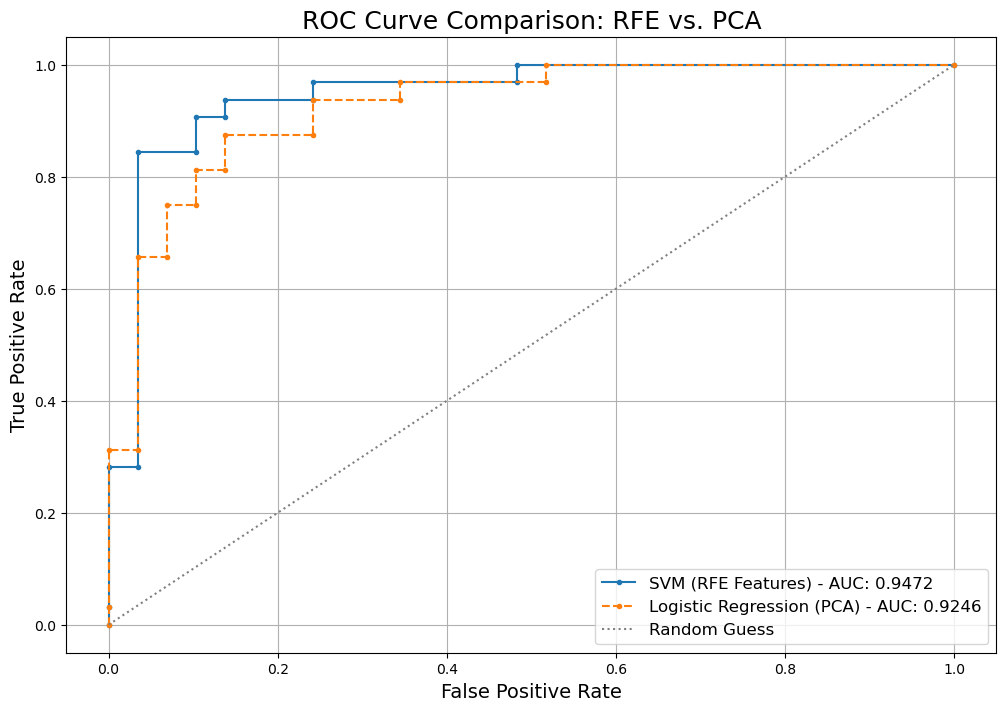

In [13]:
# --- 1. Get scores/probabilities from the best models for ROC curve calculation ---
# For SVM (best model from Experiment A), we use decision_function.
y_scores_svm = svm_model.decision_function(X_test)

# For Logistic Regression (best model from Experiment B), we use predict_proba.
y_probs_lr_pca = lr_model_pca.predict_proba(X_test_pca)[:, 1]

# --- 2. Calculate ROC curve data and AUC scores ---
# For SVM on RFE data
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_scores_svm)
auc_svm = roc_auc_score(y_test, y_scores_svm)

# For Logistic Regression on PCA data
fpr_lr_pca, tpr_lr_pca, _ = roc_curve(y_test_pca, y_probs_lr_pca)
auc_lr_pca = roc_auc_score(y_test_pca, y_probs_lr_pca)

# --- 3. Plot the ROC curves on the same graph ---
plt.figure(figsize=(12, 8))
plt.plot(fpr_svm, tpr_svm, linestyle='-', marker='.', label=f'SVM (RFE Features) - AUC: {auc_svm:.4f}')
plt.plot(fpr_lr_pca, tpr_lr_pca, linestyle='--', marker='.', label=f'Logistic Regression (PCA) - AUC: {auc_lr_pca:.4f}')
plt.plot([0, 1], [0, 1], color='grey', linestyle=':', label='Random Guess') # Random guess line

# --- 4. Configure and show the plot ---
plt.title('ROC Curve Comparison: RFE vs. PCA', fontsize=18)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig('../results/roc_curve_comparison.png')
plt.show()

In [14]:
# --- Save Final Results ---

# Define paths for the results
RESULTS_PATH = '../results/'
RFE_RESULTS_CSV_PATH = RESULTS_PATH + 'model_performance_rfe.csv'
PCA_RESULTS_CSV_PATH = RESULTS_PATH + 'model_performance_pca.csv'
ROC_CURVE_IMG_PATH = RESULTS_PATH + 'roc_curve_comparison.png'

# Save the performance tables to CSV files
results_df_sorted.to_csv(RFE_RESULTS_CSV_PATH, index=False)
results_df_pca_sorted.to_csv(PCA_RESULTS_CSV_PATH, index=False)

print(f"Results tables saved to {RESULTS_PATH}")
print("\n--- Mission Accomplished for Notebook 04! ---")

Results tables saved to ../results/

--- Mission Accomplished for Notebook 04! ---
